In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline


Accuracy unscaled test data 61.11%

Accuracy standardized test data 96.30%



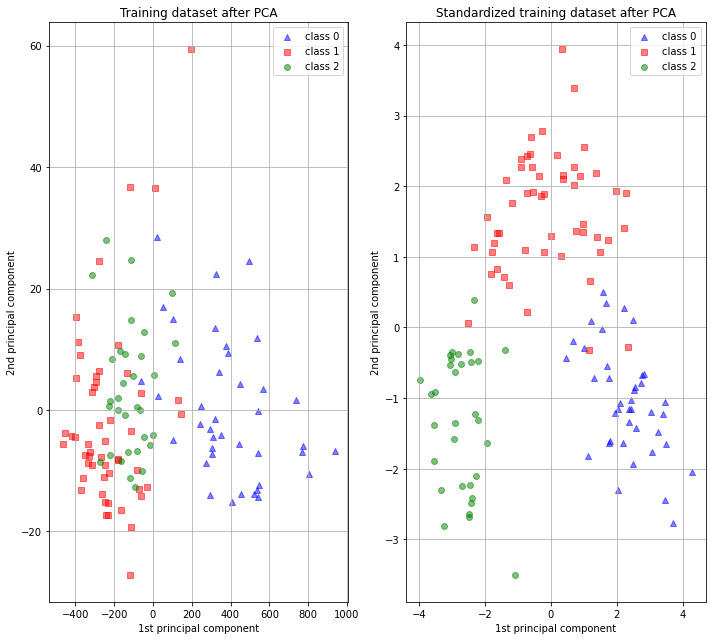

In [9]:
features, target = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=71)
us_clf = make_pipeline(PCA(n_components=2), KNeighborsClassifier())
us_clf.fit(X_train, y_train)
pred_test = us_clf.predict(X_test)

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

print('Accuracy unscaled test data {:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))
print('Accuracy standardized test data {:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

pca = us_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,9))

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
plt.show()